<a href="https://colab.research.google.com/github/Bluelieta/TSCDIA/blob/main/PROC_DE_IMAGENES_Ev1_Julieta_Battauz_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evidencia 1 - Procesamiento de Imágenes**
# Julieta Battauz
# TSCDIA - 2025
## **Manipulación y transformación de imágenes con OpenCV y PIL**




El procesamiento de imágenes es una disciplina fundamental en visión por computadora que permite manipular y analizar imágenes digitales.
 Se utilizarán para esta evidencia de aprendizaje dos bibliotecas populares:

**OpenCV (Open Source Computer Vision Library)**

Biblioteca open source ampliamente usada en visión artificial


**PIL/Pillow (Python Imaging Library)**

Biblioteca más sencilla para operaciones básicas


Ambas bibliotecas se complementan bien: PIL para tareas simples de manipulación y OpenCV para algoritmos más complejos de visión por computadora.

### 1. Importación de ambas librerías:

In [105]:

import cv2
import matplotlib.pyplot as plt



### 2. Cargar la imagen.
Se proporciona la ruta completa a la imagen que en este caso está en Drive.

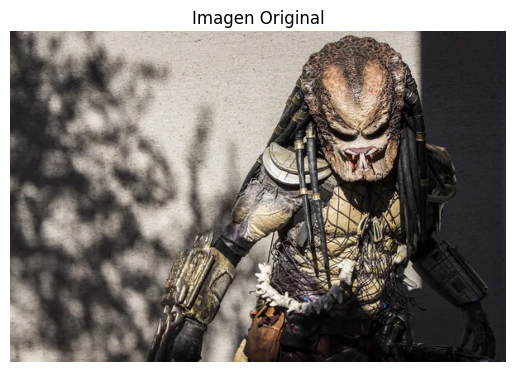

Dimensiones: (400, 600, 3)
Tipo de dato: uint8


In [134]:
# Se carga la imagen:
image = cv2.imread('/content/drive/MyDrive/Akademische DInge/ISPC/TSCDIA/Proc de Imagenes/predator.jpg')

if image is None:
  print("Error: No se pudo cargar la imagen. Verifica la ruta del archivo.")
else:
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Se convierte a RGB

  # Mostrar imagen
  plt.imshow(image)
  plt.title("Imagen Original")
  plt.axis('off')
  plt.show()

  # Obtener detalles de la imagen
  print(f"Dimensiones: {image.shape}")  # (alto, ancho, canales)
  print(f"Tipo de dato: {image.dtype}")  # uint8 (0-255)


In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **3. Manipulación Básica con PIL: Rotación y recorte**

In [111]:
from PIL import Image

# Abrir imagen
img = Image.open('/content/drive/MyDrive/Akademische DInge/ISPC/TSCDIA/Proc de Imagenes/predator.jpg')

# Se rota 42 grados
img_rotada = img.rotate(42, expand=True)

# Se recorta la imagen
img_recortada = img.crop((320, 9, 500, 200))

# Guardar resultados
img_rotada.save("rotada.jpg")
img_recortada.save("recortada.jpg")


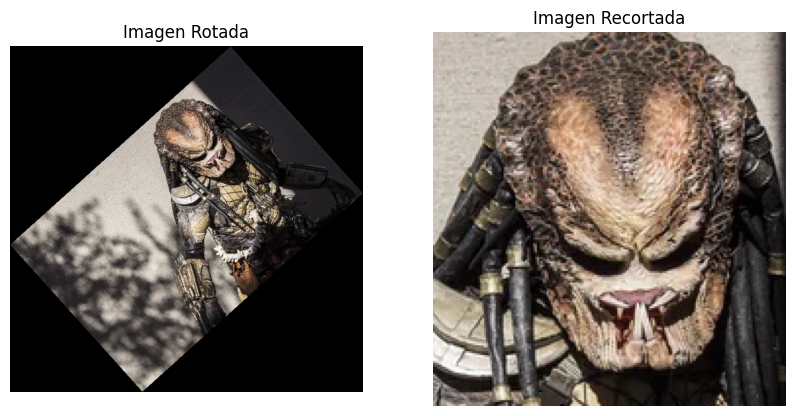

In [112]:
# Mostrar imágenes rotada y recortada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rotada)
plt.title("Imagen Rotada")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_recortada)
plt.title("Imagen Recortada")
plt.axis('off')

plt.show()


### **4. Aplicar filtros artísticos con PIL: Convertir a escala de grises y resaltar bordes**

Se convierte a escala de grises y se guardan y muestran los resultados:

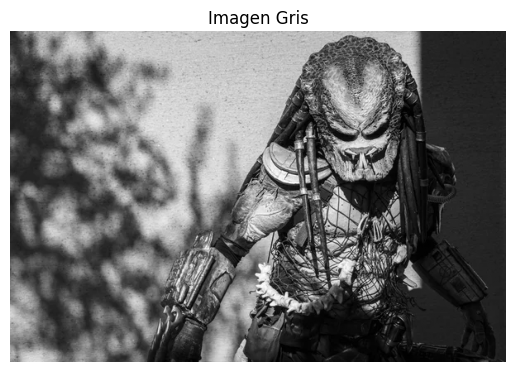

In [135]:
img_gray = img.convert('L')

img_gray.save("gris.jpg")

# Mostrar imagen gris
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen Gris")
plt.axis('off')  # Ocultar ejes
plt.show()

Se resaltan los bordes y se guardan y muestran los resultados:

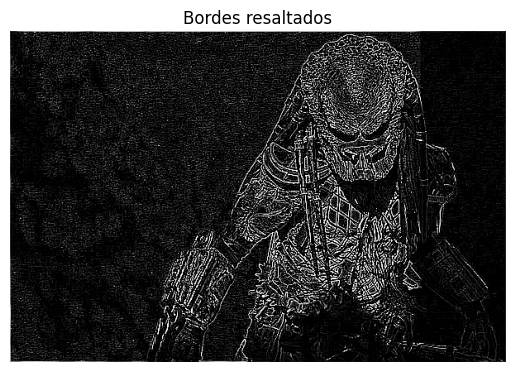

In [136]:
# Detección de bordes
from PIL import Image, ImageFilter


img_bordes = img_gray.filter(ImageFilter.FIND_EDGES)
img_bordes.save("gris.jpg")

# Mostrar la imagen con detección de bordes
plt.imshow(img_bordes, cmap='gray')
plt.title("Bordes resaltados")
plt.axis('off')
plt.show()

### **4. Desenfoque Gaussiano (Gaussian Blur)**
El desenfoque gaussiano es un filtro que suaviza una imagen reduciendo el ruido y los detalles mediante una función de distribución gaussiana.


In [137]:
from PIL import Image, ImageFilter

img = Image.open('/content/drive/MyDrive/Akademische DInge/ISPC/TSCDIA/Proc de Imagenes/predator.jpg')

# Desenfoque gaussiano
img_blur = img.filter(ImageFilter.GaussianBlur(radius=5))


img_blur.save("blur.jpg")



In [138]:
import matplotlib.image as mpimg

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

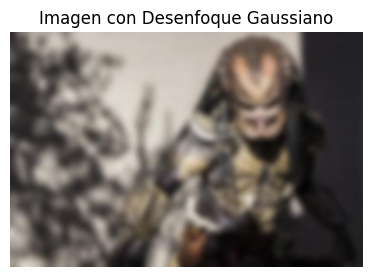

In [139]:
# Mostrar la imagen con desenfoque gaussiano
img_blur = mpimg.imread('blur.jpg')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_blur)
plt.title("Imagen con Desenfoque Gaussiano")
plt.axis('off')



### **6. Transformaciones geométricas con Open CV**

Matríz de rotación:

In [140]:
from google.colab.patches import cv2_imshow

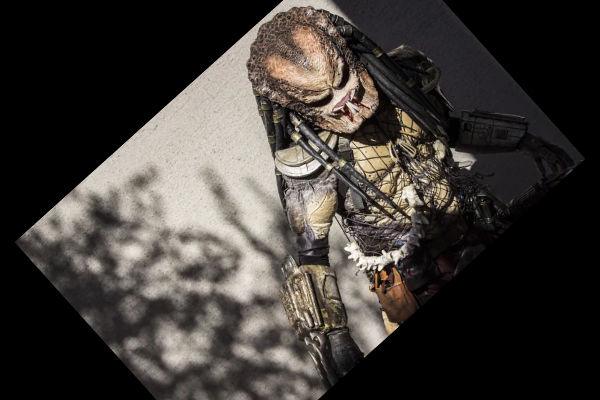

In [141]:
img = cv2.imread('/content/drive/MyDrive/Akademische DInge/ISPC/TSCDIA/Proc de Imagenes/predator.jpg')
alto, ancho = img.shape[:2]

# Matriz de rotación (30 grados, escalado 0.8)
matriz = cv2.getRotationMatrix2D((ancho/2, alto/2), 42, 0.8)
img_rotada = cv2.warpAffine(img, matriz, (ancho, alto))

cv2_imshow(img_rotada)


Transformación de perspectiva

In [142]:
import numpy as np

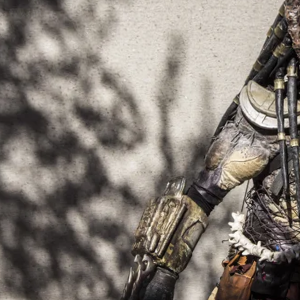

In [143]:
# Puntos de origen y destino (ej: corrección de perspectiva)
puntos_origen = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
puntos_destino = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

matriz_perspectiva = cv2.getPerspectiveTransform(puntos_origen, puntos_destino)
img_transformada = cv2.warpPerspective(img, matriz_perspectiva, (300, 300))

cv2_imshow(img_transformada)

### **7. Umbralización (Binarización)**

La umbralización (o binarización) es una técnica básica de procesamiento de imágenes que convierte una imagen en escala de grises en una imagen binaria (blanco y negro).

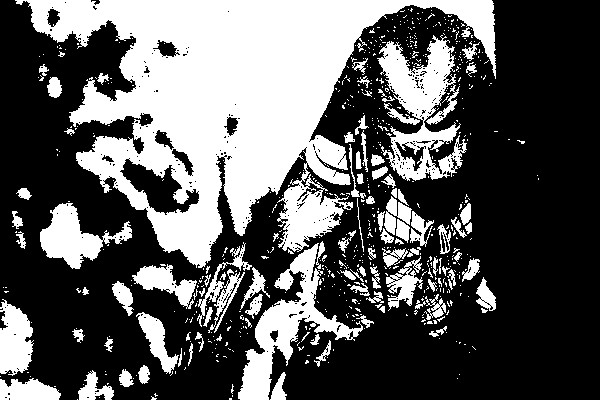

In [145]:
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_binaria = cv2.threshold(img_gris, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(img_binaria)  # Use cv2_imshow instead of cv2.imshow

### 8. Detección de bordes Canny

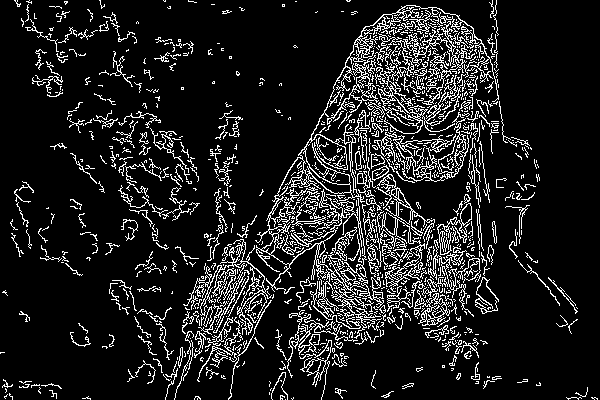

In [100]:
bordes = cv2.Canny(img, 100, 200)
cv2_imshow(bordes)

## **9.Integración de Open CV y PIL**

In [146]:
import cv2
from PIL import Image
import numpy as np

# OpenCV a PIL
img_opencv = cv2.imread('/content/drive/MyDrive/Akademische DInge/ISPC/TSCDIA/Proc de Imagenes/predator.jpg')
img_pil = Image.fromarray(cv2.cvtColor(img_opencv, cv2.COLOR_BGR2RGB))

# PIL a OpenCV
img_pil_modified = img_pil.rotate(45)
img_opencv_modified = cv2.cvtColor(np.array(img_pil_modified), cv2.COLOR_RGB2BGR)


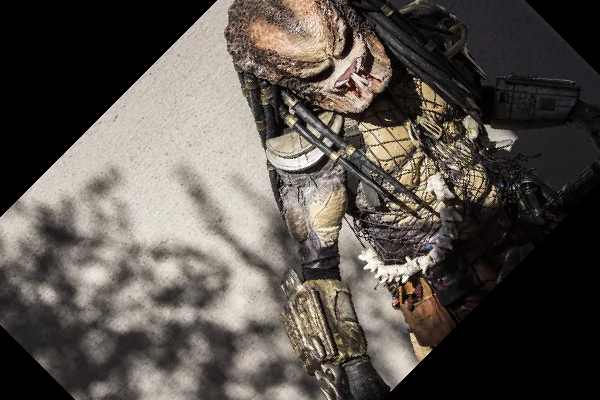

In [147]:
  cv2_imshow(img_opencv_modified)